In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv(r"C:\Users\Aagya\Downloads\Cardio_Disease\CVD_cleaned.csv")

In [3]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
data.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [5]:
print(f'Shape of dataset: {data.shape}')

Shape of dataset: (308854, 19)


In [6]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

# Data cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [8]:
#checking null values
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [9]:
data.duplicated().sum()

80

In [10]:
#removing all duplicate row
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

# EDA(Exploratory data analysis)

In [11]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [12]:
data['Sex'].value_counts()

Female    160155
Male      148619
Name: Sex, dtype: int64

In [13]:
data['Checkup'].value_counts()

Within the past year       239295
Within the past 2 years     37210
Within the past 5 years     17442
5 or more years ago         13420
Never                        1407
Name: Checkup, dtype: int64

In [14]:
data['General_Health'].value_counts()

Very Good    110351
Good          95355
Excellent     55929
Fair          35808
Poor          11331
Name: General_Health, dtype: int64

In [15]:
data['Exercise'].value_counts()

Yes    239305
No      69469
Name: Exercise, dtype: int64

In [16]:
data['Age_Category'].value_counts()

65-69    33425
60-64    32409
70-74    31099
55-59    28048
50-54    25090
80+      22269
40-44    21587
45-49    20963
75-79    20699
35-39    20598
18-24    18670
30-34    18425
25-29    15492
Name: Age_Category, dtype: int64

In [17]:
data['Sex'].value_counts()

Female    160155
Male      148619
Name: Sex, dtype: int64

# Data visualization

<Axes: xlabel='count', ylabel='Age_Category'>

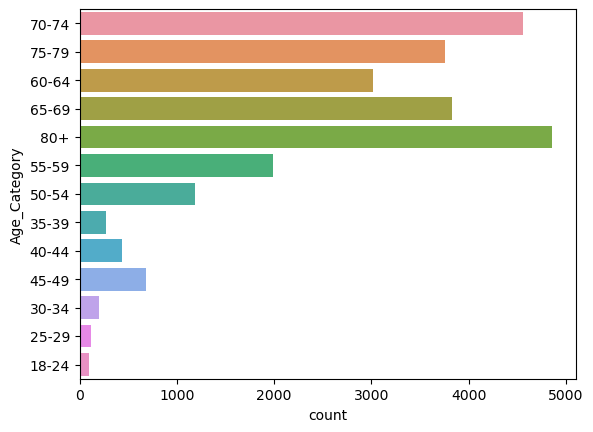

In [22]:
sns.countplot(data = data, y = 'Age_Category')

Above the age of 65,the risk of cardio diseases increases

<Axes: xlabel='count', ylabel='Diabetes'>

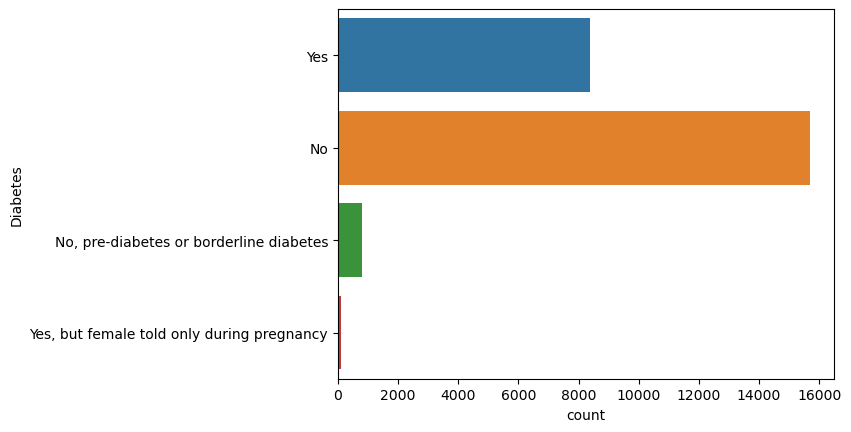

In [24]:
sns.countplot(data = data, y = 'Diabetes')

Diabetes is not an necessary symptom alone ,but if paired with other symptoms it may predict something

<Axes: xlabel='count', ylabel='Diabetes'>

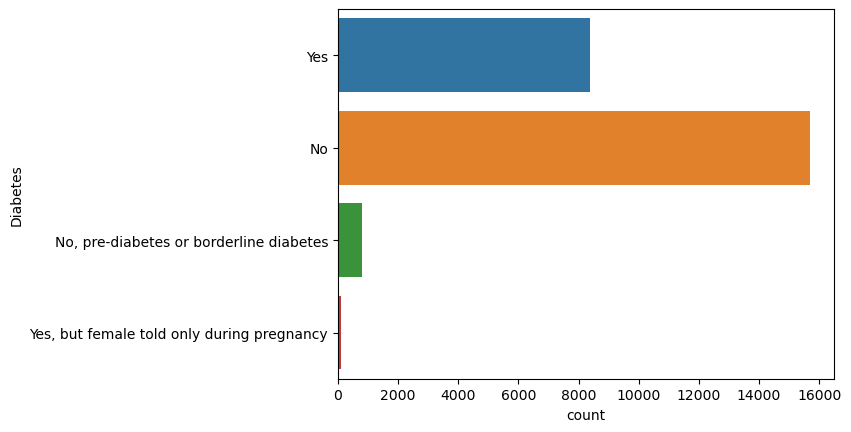

In [26]:
sns.countplot(data = data, y = 'Diabetes')

<Axes: xlabel='count', ylabel='Heart_Disease'>

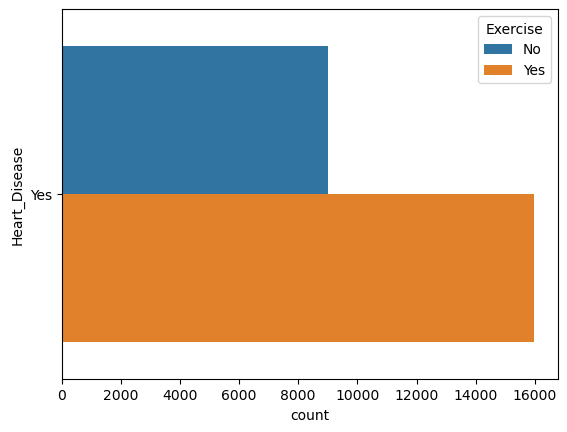

In [27]:
sns.countplot(data = data, hue = 'Exercise', y = 'Heart_Disease')

Exercise is an important factor since most of the people do exercise for not suffering from cardio vascular disease.

<Axes: xlabel='count', ylabel='Heart_Disease'>

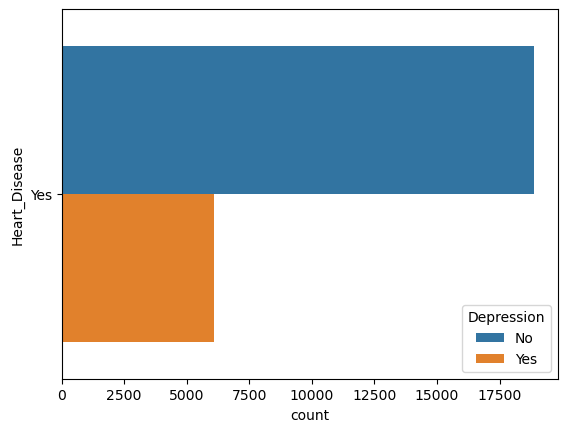

In [28]:
sns.countplot(data = data, hue = 'Depression', y = 'Heart_Disease')

Depression is not consider as an symptom.

<Axes: xlabel='count', ylabel='Heart_Disease'>

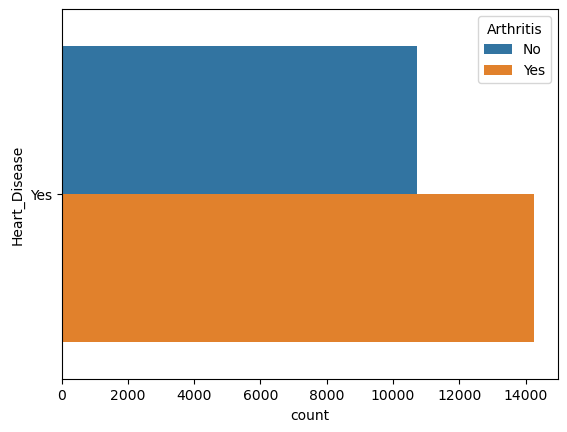

In [29]:
sns.countplot(data = data, hue = 'Arthritis', y = 'Heart_Disease')

Arthritis might be one for the cardio diseases.

<Axes: xlabel='count', ylabel='Heart_Disease'>

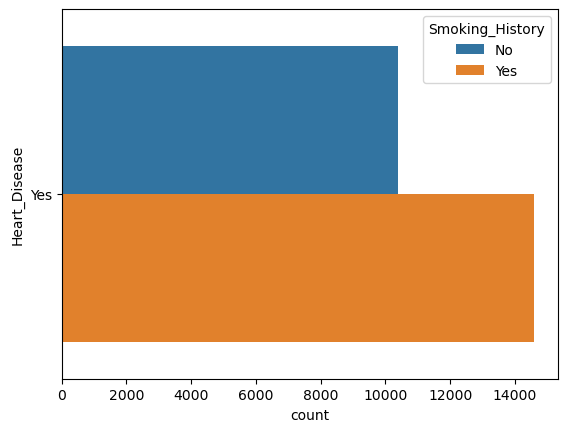

In [30]:
sns.countplot(data = data, hue = 'Smoking_History', y = 'Heart_Disease')

smoking might be another possible symptom

<Axes: xlabel='count', ylabel='Heart_Disease'>

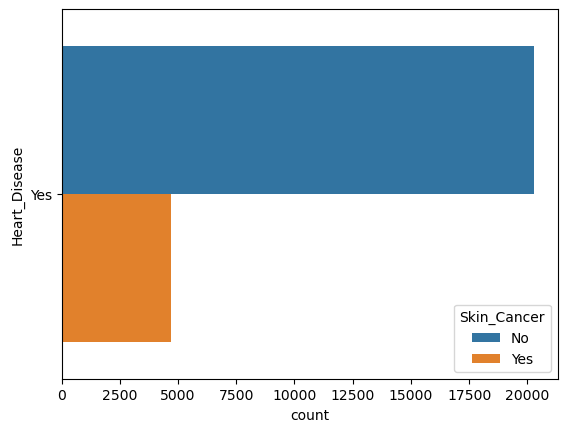

In [31]:
sns.countplot(data = data, hue = 'Skin_Cancer', y = 'Heart_Disease')

skin cancer is not considered as a symptom

<Axes: xlabel='count', ylabel='Heart_Disease'>

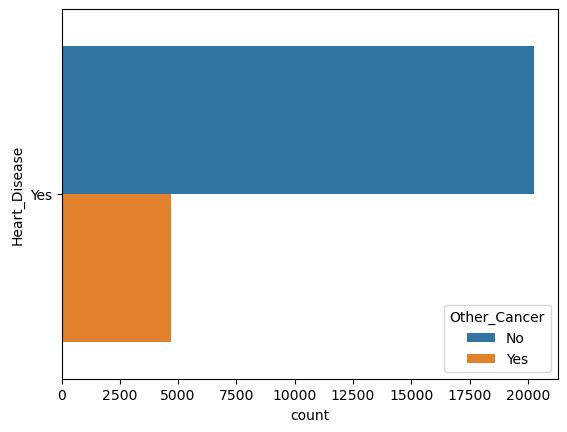

In [32]:
sns.countplot(data = data, hue = 'Other_Cancer', y = 'Heart_Disease')

other type of cancer be considered as another symptom

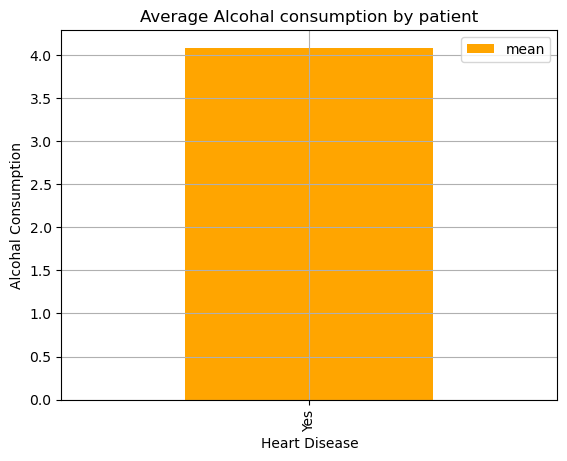

In [33]:
data.groupby('Heart_Disease')['Alcohol_Consumption'].agg(['mean']).plot(kind = 'bar',
                                                                        title = 'Average Alcohal consumption by patient',
                                                                        color = 'orange')
plt.grid()
plt.xlabel('Heart Disease')
plt.ylabel('Alcohal Consumption')
plt.show()

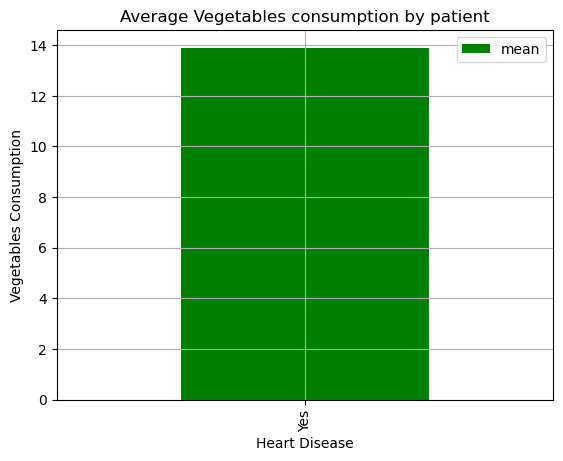

In [34]:
data.groupby('Heart_Disease')['Green_Vegetables_Consumption'].agg(['mean']).plot(kind = 'bar',
                                                                        title = 'Average Vegetables consumption by patient',
                                                                        color = 'green')
plt.grid()
plt.xlabel('Heart Disease')
plt.ylabel('Vegetables Consumption')
plt.show()

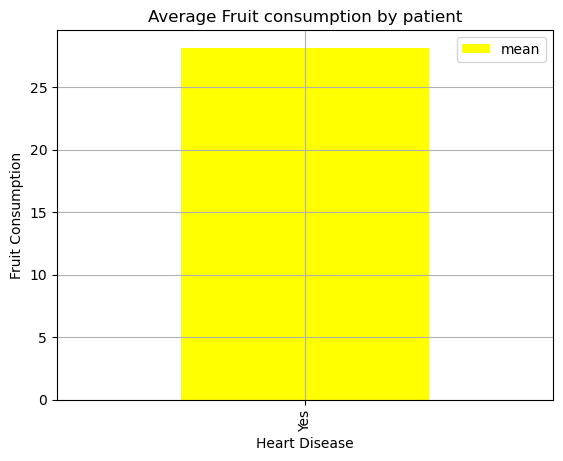

In [35]:
data.groupby('Heart_Disease')['Fruit_Consumption'].agg(['mean']).plot(kind = 'bar',
                                                                        title = 'Average Fruit consumption by patient',
                                                                        color = 'yellow')
plt.grid()
plt.xlabel('Heart Disease')
plt.ylabel('Fruit Consumption')
plt.show()

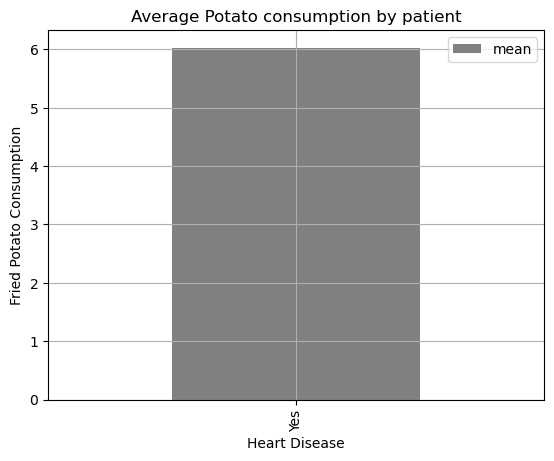

In [36]:
data.groupby('Heart_Disease')['FriedPotato_Consumption'].agg(['mean']).plot(kind = 'bar',
                                                                        title = 'Average Potato consumption by patient',
                                                                        color = 'grey')
plt.grid()
plt.xlabel('Heart Disease')
plt.ylabel('Fried Potato Consumption')
plt.show()

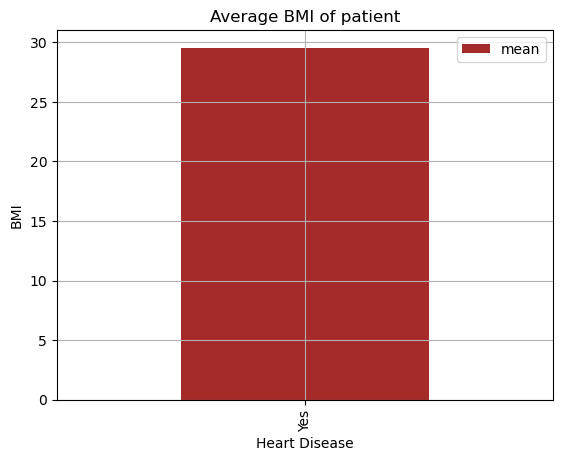

In [37]:
data.groupby('Heart_Disease')['BMI'].agg(['mean']).plot(kind = 'bar',
                                                        title = 'Average BMI of patient',
                                                        color = 'brown')
plt.grid()
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

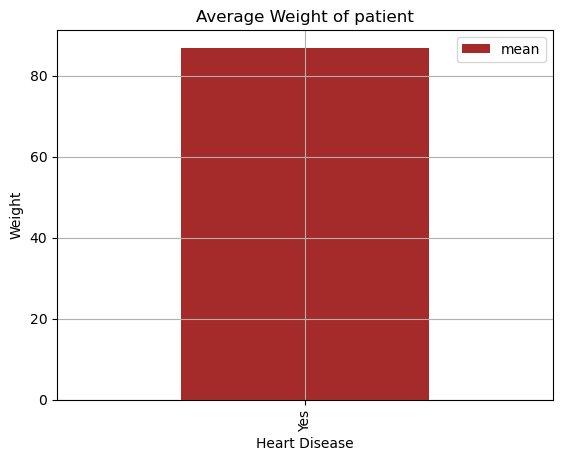

In [38]:
data.groupby('Heart_Disease')['Weight_(kg)'].agg(['mean']).plot(kind = 'bar',
                                                        title = 'Average Weight of patient',
                                                        color = 'brown')
plt.grid()
plt.xlabel('Heart Disease')
plt.ylabel('Weight')
plt.show()

1.Vegetables ,fruits and potato is less consumed by the heart patien

2.Alochol consumption doesn't affect the chances of heart disease

3. BMI and Weight is found to be slightly higher in case of heart patients

<Axes: xlabel='count', ylabel='General_Health'>

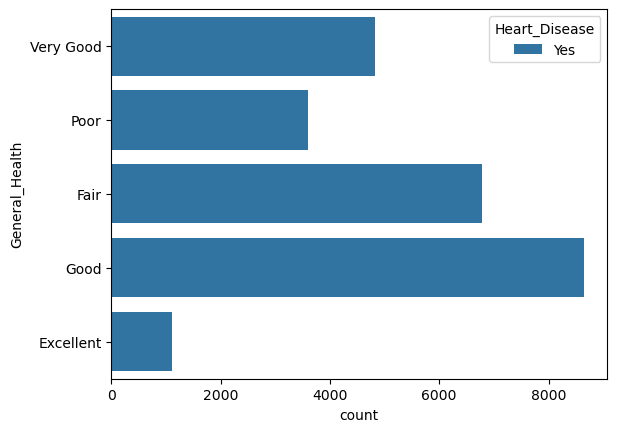

In [39]:
sns.countplot(data = data, y = 'General_Health', hue = 'Heart_Disease')

In [40]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

# DATA PREPROCESSING

In [54]:
data_no = data[data['Heart_Disease'] == 'No']
len(data_no)

0

In [55]:
data_sample_no = df_no[200: 25171]

array([<Axes: ylabel='count'>], dtype=object)

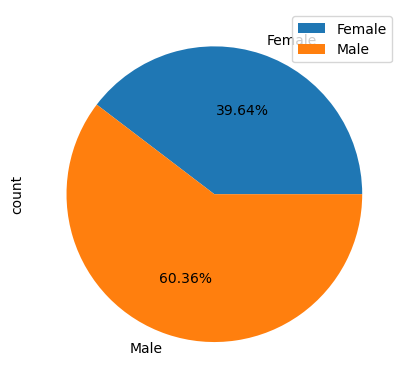

In [56]:
data = data[data['Heart_Disease'] == 'Yes']

palette_color = sns.color_palette('bright')
data.groupby('Sex')['Heart_Disease'].agg(['count']).plot(kind = 'pie', subplots = True, autopct = '%1.2f%%')

In [57]:
print(f"Length of dataframe with heart patients : {len(data)} and not heart patients : {len(data_sample_no)} ")

Length of dataframe with heart patients : 24971 and not heart patients : 0 


In [59]:
upd_data = pd.concat([data, data_sample_no], axis = 0)

In [60]:
upd_data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
10,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Female,75-79,160.0,74.84,29.23,No,0.0,30.0,20.0,2.0
11,Fair,Within the past year,No,Yes,Yes,No,No,Yes,No,Male,75-79,175.0,73.48,23.92,No,0.0,2.0,8.0,30.0


In [61]:
upd_data.shape

(24971, 19)

LABEL ENCODER TO CONVERT THE CATEGORICAL VALUES TO NUMERICAL VALUES 

In [62]:
col_encoded = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
              'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History',
              'Age_Category']

In [63]:
lb = LabelEncoder()

for i in col_encoded:
  upd_data[i] = lb.fit_transform(upd_data[i])

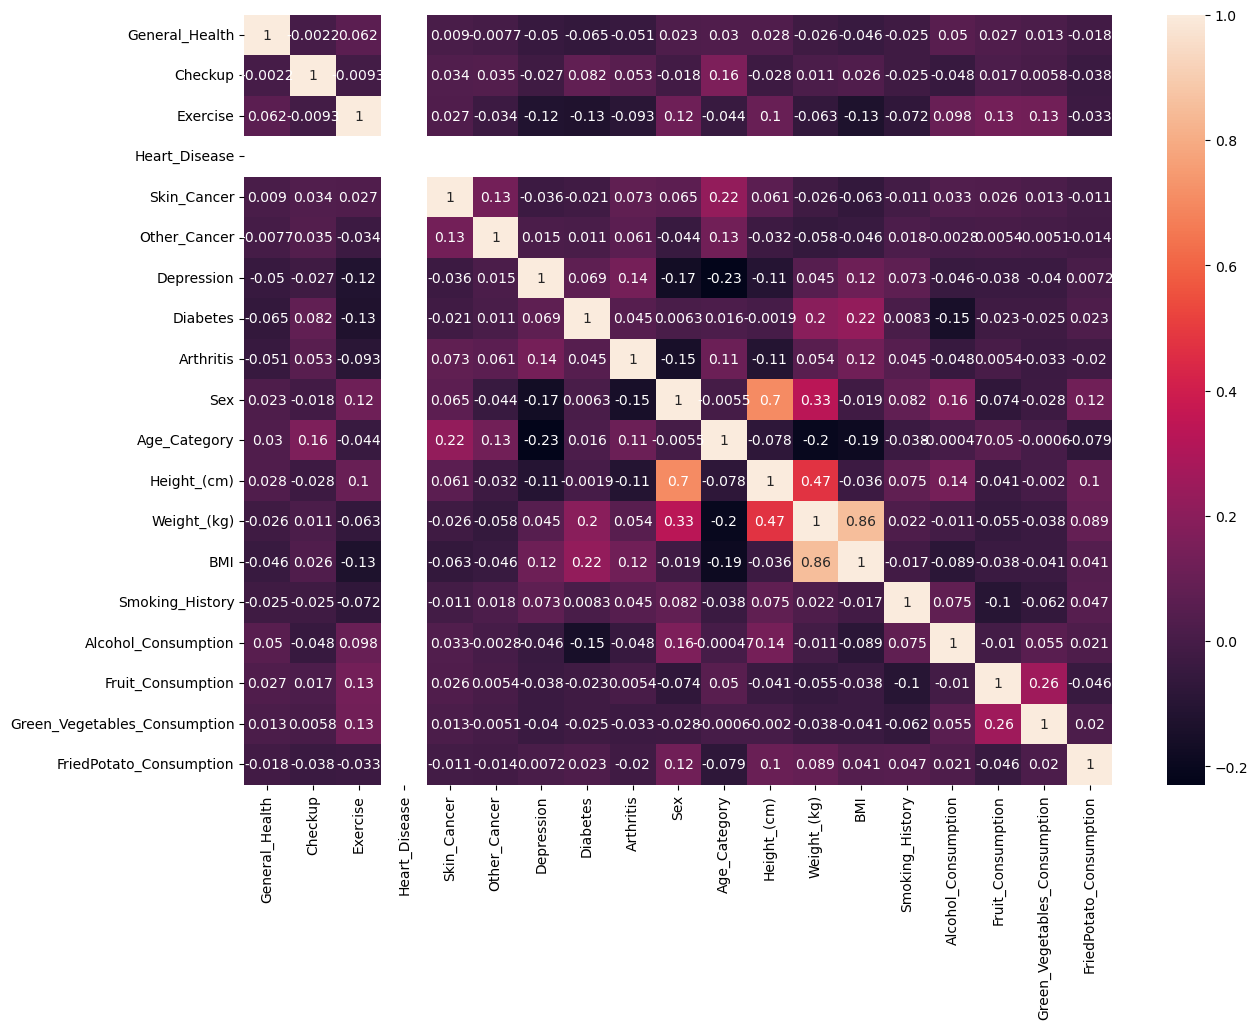

In [65]:
plt.figure(figsize = (14,10))
sns.heatmap(upd_data.corr(), fmt = '.2g', annot = True)
plt.show()

In [67]:
features = upd_data[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]
target = np.asanyarray(upd_data['Heart_Disease'])

# SCALING THE TRAINING DATA USING MIN MAX SCALER

In [68]:
sc = MinMaxScaler(feature_range = (0,1))
features = sc.fit_transform(features)

In [69]:
features[:2]

array([[1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.66666667, 0.        , 0.        , 0.83333333,
        0.592     , 0.18583826, 0.21161392, 0.        , 0.        ,
        0.25      , 0.        , 0.03333333],
       [0.75      , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.66666667, 0.        , 1.        , 0.91666667,
        0.712     , 0.25025641, 0.21736856, 0.        , 0.        ,
        0.25      , 0.24193548, 0.06666667]])

In [70]:
features.shape

(24971, 18)

# PERFORMING THE TRAIN TEST SPLIT USING SKLEARN

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.25,
                                                    stratify = target,
                                                    random_state = 2023)

In [72]:
print(f"Shape of x_train : {x_train.shape} and y_train : {y_train.shape}")
print(f"\nShape of x_test : {x_test.shape} and y_test : {y_test.shape}")

Shape of x_train : (18728, 18) and y_train : (18728,)

Shape of x_test : (6243, 18) and y_test : (6243,)


#NEURAL NET MODEL 

In [73]:
import tensorflow as tf
import keras

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(25, activation = 'relu', input_shape = (18,)),

    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation = 'relu'),

    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [75]:
model.compile(optimizer = 'Adam',
              metrics = ['accuracy'],
              loss = 'binary_crossentropy')

In [76]:
BATCH_SIZE = 50

model.fit(x_train, y_train, epochs = 50, batch_size = BATCH_SIZE, verbose = 1)

Epoch 1/50
375/375 [==============================] - 2s 2ms/step - loss: 0.0556 - accuracy: 0.9950
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 3.0800e-04 - accuracy: 1.0000
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 1.0780e-04 - accuracy: 1.0000
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 7.8154e-05 - accuracy: 1.0000
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 4.6240e-05 - accuracy: 1.0000
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 1.4950e-05 - accuracy: 1.0000
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 3.4906e-05 - accuracy: 1.0000
Epoch 8/50
375/375 [==============================] - 1s 2ms/step - loss: 4.9584e-06 - accuracy: 1.0000
Epoch 9/50
375/375 [==============================] - 1s 2ms/step - loss: 1.0338e-05 - accuracy: 1.0000
Epoch 10/50
375/375 [==============================] - 1s 2ms/step -

In [77]:
model.evaluate(x_test, y_test)

196/196 [==============================] - 0s 1ms/step - loss: 1.3135e-23 - accuracy: 1.0000


[1.3134803862359432e-23, 1.0]

# TESTING ON SOME CASES FROM TEST DATA

In [78]:
x_test[0].shape

(18,)

In [79]:
import random

def prediction():
  for i in range(5):
    x = random.randint(0, len(x_test))
    input = np.expand_dims(x_test[x], axis = 0)
    pred = np.round(model.predict(input)[0][0])
    print(f"\nPrediction for the entry number {x} is '{pred}' and actual result is '{y_test[x]}'....\n")

if __name__ == '__main__':
  prediction()

1/1 [==============================] - 0s 131ms/step

Prediction for the entry number 2479 is '0.0' and actual result is '0'....

1/1 [==============================] - 0s 29ms/step

Prediction for the entry number 3736 is '0.0' and actual result is '0'....

1/1 [==============================] - 0s 16ms/step

Prediction for the entry number 1235 is '0.0' and actual result is '0'....

1/1 [==============================] - 0s 33ms/step

Prediction for the entry number 2790 is '0.0' and actual result is '0'....

1/1 [==============================] - 0s 38ms/step

Prediction for the entry number 4617 is '0.0' and actual result is '0'....



THANKYOU